## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
#total column names
application_df.columns

Index(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [3]:
# Drop the non-beneficial ID columns, 'EIN'.
application_df = application_df.drop(columns = ['EIN'])


In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
counts_1 = application_df['NAME'].value_counts()
counts_1

NAME
PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: count, Length: 19568, dtype: int64

In [6]:
# Choose a cutoff value and create a list of names_replace to be replaced
# use the variable name names_replace
names_replace = list(counts_1[counts_1<5].index)
names_replace

['AMALGAMATED TRANSIT UNION',
 '4-H CLUBS & AFFILIATED 4-H ORGANIZATIONS',
 'TEXAS WATER UTILITIES ASSOCIATION',
 'PARENTS FAMILIES AND FRIENDS OF LESBIANS AND GAYS INC',
 'THE UNITED STATE PONY CLUBS INC',
 'WESTERN GOVERNORS UNIVERSITY',
 'AMERICAN ORFF-SCHULWERK ASSOCIATION',
 'GAMMA PHI BETA SORORITY INC',
 'AMATEUR ATHLETIC UNION OV THE UNITED STATES INC',
 'DEPARTMENT OF OKLAHOMA LADIES AUXILIARY TO THE VFW INC',
 'PILOT CLUB INTERNATIONAL',
 'DELTA CHI NATIONAL HOUSING CORPORATION',
 'SOROPTIMIST INTERNATIONAL TO THE AMERICAS INC',
 'WOODMEN OF THE WORLD LIFE INSURANCE SOCIETY',
 'COMMUNICATION ALLIANCE TO NETWORK THOROUGHBRED EX-RACEHORSES',
 'BLUE STAR MOTHERS OF AMERICA INC',
 'MUSIC TEACHERS NATIONAL ASSOCIATION',
 'YOUNG CATHOLIC PROFESSIONALS',
 'METHODIST RETIREMENT COMMUNITIES',
 'PTA NEW MEXICO CONGRESS',
 'UNITED MINE WORKERS OF AMERICA- INTERNATIONAL',
 'TEXAS EXTENSION EDUCATION ASSOCIATION',
 'VESTAVIA HILLS PARENT TEACHER ORGANIZATION INC',
 'INTERNATIONAL ASSOCIAT

In [7]:
# Replace in dataframe
for name in names_replace:
    application_df['NAME'] = application_df['NAME'].replace(name,"Other")

# Check to make sure binning was successful
application_df['NAME'].value_counts()

NAME
Other                                                                19803
PARENT BOOSTER USA INC                                                1260
TOPS CLUB INC                                                          765
UNITED STATES BOWLING CONGRESS INC                                     700
WASHINGTON STATE UNIVERSITY                                            492
                                                                     ...  
GUILDS OF THE SANTA FE OPERA INC                                         5
FAMILY MOTOR COACH ASSOCIATION                                           5
JAMESTOWN SOCIETY                                                        5
MOST WORSHIPFUL PRINCE HALL GRAND LODGE OF FREE & ACCEPTED MASONS        5
PTA HAWAII CONGRESS                                                      5
Name: count, Length: 403, dtype: int64

In [8]:
# Look at APPLICATION TYPE counts for binning
counts = application_df['APPLICATION_TYPE'].value_counts()
counts

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [9]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(counts[counts<500].index)
application_types_to_replace

['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

In [10]:
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [11]:
# Look at CLASSIFICATION value counts for binning
countsbinning = application_df['CLASSIFICATION'].value_counts()

In [12]:
# You may find it helpful to look at CLASSIFICATION value counts >1
countsclassification = countsbinning[countsbinning>1]
countsclassification

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [13]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list (countsbinning[countsbinning<100].index)
classifications_to_replace

['C2800',
 'C7100',
 'C1300',
 'C1280',
 'C1230',
 'C1400',
 'C7200',
 'C2300',
 'C1240',
 'C8000',
 'C7120',
 'C1500',
 'C1800',
 'C6000',
 'C1250',
 'C8200',
 'C1238',
 'C1278',
 'C1235',
 'C1237',
 'C7210',
 'C2400',
 'C1720',
 'C4100',
 'C1257',
 'C1600',
 'C1260',
 'C2710',
 'C0',
 'C3200',
 'C1234',
 'C1246',
 'C1267',
 'C1256',
 'C2190',
 'C4200',
 'C2600',
 'C5200',
 'C1370',
 'C1248',
 'C6100',
 'C1820',
 'C1900',
 'C1236',
 'C3700',
 'C2570',
 'C1580',
 'C1245',
 'C2500',
 'C1570',
 'C1283',
 'C2380',
 'C1732',
 'C1728',
 'C2170',
 'C4120',
 'C8210',
 'C2561',
 'C4500',
 'C2150']

In [14]:
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: count, dtype: int64

In [15]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df,dtype=float)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_ACTS MINISTRY,NAME_ACTS MISSIONS,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
y

# drop 'IS SUCCESSFUL'
X = application_df.drop('IS_SUCCESSFUL', axis=1).values
X

array([[1.0000000e+00, 5.0000000e+03, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.0859000e+05, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 5.0000000e+03, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       ...,
       [1.0000000e+00, 5.0000000e+03, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 5.0000000e+03, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 3.6500179e+07, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00]])

In [17]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [18]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [19]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=80, input_dim=len( X_train_scaled[0]), activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

c:\Users\Anupreet Virk\.anaconda\New folder\New folder\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 80)             │        36,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         2,430 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,701 (151.18 KB)

 Trainable params: 38,701 (151.18 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [21]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,validation_split=0.15, epochs=100)

Epoch 1/100
684/684 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7300 - loss: 0.5453 - val_accuracy: 0.7968 - val_loss: 0.4325
Epoch 2/100
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8023 - loss: 0.4246 - val_accuracy: 0.7963 - val_loss: 0.4304
Epoch 3/100
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7942 - loss: 0.4282 - val_accuracy: 0.7979 - val_loss: 0.4301
Epoch 4/100
684/684 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8019 - loss: 0.4179 - val_accuracy: 0.8020 - val_loss: 0.4289
Epoch 5/100
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8040 - loss: 0.4140 - val_accuracy: 0.8051 - val_loss: 0.4276
Epoch 6/100
684/684 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8004 - loss: 0.4147 - val_accuracy: 0.8041 - val_loss: 0.4284
Epoch 7/100
684/684 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7993 - loss: 0.4159 - val_accuracy: 0.8007 - val_loss: 0.4312
Epoch 8/100
684/684 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8062 - loss: 0.4118 - val_accu

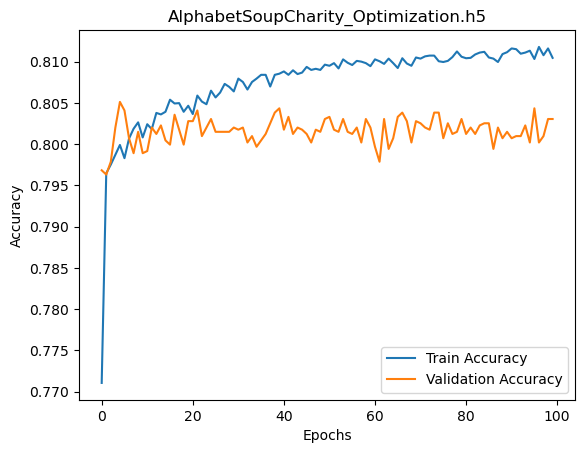

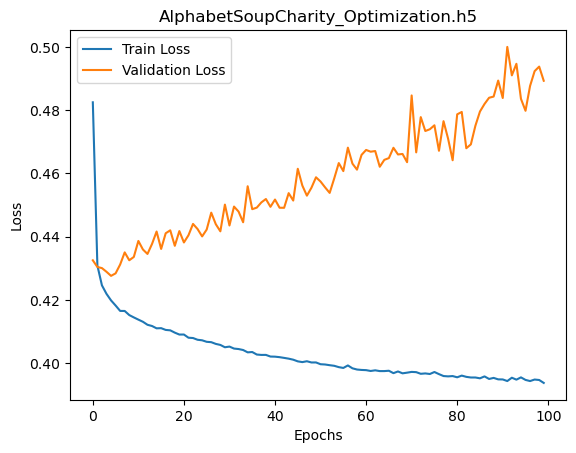

In [25]:
#Comparison of Training and Validation Accuracy and Loss
# Plot training and validation accuracy
plt.plot(fit_model.history['accuracy'], label='Train Accuracy')
plt.plot(fit_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title ('AlphabetSoupCharity_Optimization.h5')
plt.savefig('accuracy_plot_optimization.png')
plt.show()

# Plot training and validation loss
plt.plot(fit_model.history['loss'], label='Train Loss')
plt.plot(fit_model.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('AlphabetSoupCharity_Optimization.h5')
plt.savefig('loss_plot_optimization.png')
plt.show()

In [22]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - 2ms/step - accuracy: 0.7865 - loss: 0.5014
Loss: 0.5014128088951111, Accuracy: 0.7864723205566406


In [23]:
# Export our model to HDF5 file

nn.save('AlphabetSoupCharity_Optimization.h5')